# Отчёт по работе с кейсом "Оракул" 

## Линейная Регрессия 

*В данном документе была разобрана работа алгоритма Линейной Регрессии библиотеки sklearn с множественными вариациями вводимых данных. В кейсе указано сделать предсказания на: 10 минут, 1 час, 12 часов и 24 часа. Изначально в предложенном датасете "rps_1w.csv" указаны значения в 5 минутках на (округлённо) неделю. Причесал датасет и форматировал в xls для удобства, разграничив колонки.*


In [31]:
import pandas as pd

In [32]:
#Записываю в dat_fra файл с данными (датасет)

dat_fra = pd.read_excel("rps_1w.xls")


In [33]:
#Записываю в traffic dat_fra колонку value

traffic = dat_fra["value"]


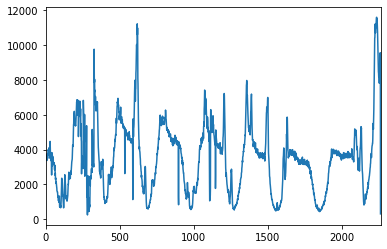

In [34]:
#Просто графичек

traffic.plot()


In [35]:
#Просто смотрел длинну, проверял

traffic

0       3530.323333
1       3568.590000
2       3468.773333
3       3606.650000
4       3383.800000
           ...     
2256    8934.210000
2257    9363.986667
2258    9561.926667
2259    9375.830000
2260     299.300000
Name: value, Length: 2261, dtype: float64

# Поле изменяемых параметров необходимого времени для расчетов

## fut соответствует желаемому предсказанию по времени, так

* **fut**=2 соответствует 10 минутам
* **fut**=12 соответствует часу
* **fut**=144 соответсвует 12 часам
* **fut**=288 соответсвует 24 часам

* **pas** вариативно и соответствует данным из прошлого, которые мы берём из датасета для расчетов

In [36]:
#В данном поле можно играться значениями для проверки и получения наилучшего результата.
#В отчёте (заключение с разъяснением) представлены используемые значения, которые можно проверить самостоятельно.

pas = 2 * 6         # данные за время с 24.11 17.40
fut = 2               # предсказание на 10 минут. 
                      

In [37]:
#Проверка длинны

len(traffic)

2261

In [38]:
#Указываю начало для алгоритма и конец соответственно

strt = pas
end = len(traffic) - fut 

In [39]:
#в pf_df записал массив цикла от начала и до конца

pf_df = []
for i in range(strt,end):
    p_and_f = traffic[(i-pas):(i+fut)]
    pf_df.append(list(p_and_f))

In [40]:
#Проверочка длинны листа, строчек

len(pf_df) 

2247

In [41]:
#Проверка столбцов

len(pf_df[0]) 

14

In [43]:
#Именую столбцы(колоночки) прошлого с помощью цикла

pas_col = []
for i in range(pas):
    pas_col.append("pas_{}".format(i)) 

In [44]:
#Именую столбцы(колоночки) будущего с помощью того же цикла

fut_col = []
for i in range(fut):
    fut_col.append("fut_{}".format(i)) 

In [45]:
#Варю в dat_fra итоговый датафрейм

dat_fra = pd.DataFrame(pf_df, columns=(pas_col+fut_col))

In [46]:
dat_fra

,pas_0,pas_1,pas_2,pas_3,pas_4,pas_5,pas_6,pas_7,pas_8,pas_9,pas_10,pas_11,fut_0,fut_1
0,3530.323333,3568.590000,3468.773333,3606.650000,3383.800000,3485.766667,3618.750000,3365.860000,3579.640000,3423.506667,3458.586667,3768.730000,3648.416667,3486.386667
1,3568.590000,3468.773333,3606.650000,3383.800000,3485.766667,3618.750000,3365.860000,3579.640000,3423.506667,3458.586667,3768.730000,3648.416667,3486.386667,3732.016667
2,3468.773333,3606.650000,3383.800000,3485.766667,3618.750000,3365.860000,3579.640000,3423.506667,3458.586667,3768.730000,3648.416667,3486.386667,3732.016667,3724.240000
3,3606.650000,3383.800000,3485.766667,3618.750000,3365.860000,3579.640000,3423.506667,3458.586667,3768.730000,3648.416667,3486.386667,3732.016667,3724.240000,3672.356667
4,3383.800000,3485.766667,3618.750000,3365.860000,3579.640000,3423.506667,3458.586667,3768.730000,3648.416667,3486.386667,3732.016667,3724.240000,3672.356667,3968.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,10000.130000,9670.606667,9185.806667,8829.103333,8471.213333,8391.656667,8165.090000,8178.313333,7989.160000,7916.613333,7812.323333,7912.173333,8060.066667,8805.900000
2243,9670.606667,9185.806667,8829.103333,8471.213333,8391.656667,8165.090000,8178.313333,7989.160000,7916.613333,7812.323333,7912.173333,8060.066667,8805.900000,8934.210000
2244,9185.806667,8829.103333,8471.213333,8391.656667,8165.090000,8178.313333,7989.160000,7916.613333,7812.323333,7912.173333,8060.066667,8805.900000,8934.210000,9363.986667
2245,8829.103333,8471.213333,8391.656667,8165.090000,8178.313333,7989.160000,7916.613333,7812.323333,7912.173333,8060.066667,8805.900000,8934.210000,9363.986667,9561.926667


# Значения для учебника и экзамена должны быть равными

In [47]:
#В отчёте(заключение с разъяснением) представлены используемые значения, которые можно проверить и вариировать самостоятельно.
#Число соответсвует отрезку по колонкам как для учебника, так и для экзамена

#Учебник для алгоритмов


x = dat_fra[pas_col][:-2]        # Задачи (Входные данные)
y = dat_fra[fut_col][:-2]      # Предсказание (Ответы)

#Экзамен

x_test = dat_fra[pas_col][-2:]      # Задачи
y_test = dat_fra[fut_col][-2:]    # Ответы

In [48]:
# Из библиотеки взял алгорит Линейной Регрессии

from sklearn.linear_model import LinearRegression 

In [49]:
#Создал объект,экземпляр алгоритма, который можно обучать

LinReg = LinearRegression()

In [50]:
#Обучаю алгоритм,даю съесть учебник

LinReg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
#Обращаюсь к алгоритму, чтобы он предсказал будущее на данных из x_test

prediction = LinReg.predict(x_test)

In [52]:
# Для рисования графиков

import matplotlib.pyplot as plt

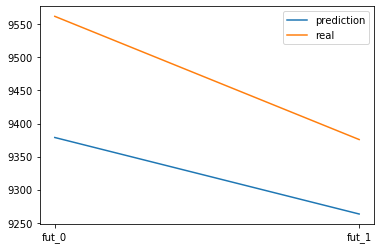

In [53]:
#Рисует график
#Значения параметров prediction и y_test пропорциональны 
#Пример: если учебник и экзамен -12, то prediction от 0 до 11, а y_test от -12 до -1

plt.plot(prediction[1], label="prediction")
plt.plot(y_test[-1:].iloc[0], label="real")
plt.legend()


In [54]:
# Импортировал метрику, средняя абсолютная ошибка

from sklearn.metrics import mean_absolute_error

In [55]:
# Средняя абсолютная ошибка за один день

mean_absolute_error(y_test[-1:].iloc[0],prediction[1])

147.73759479957243

In [56]:
# Функция рассчета ошибки

def printErrors(prediction):
    errors_list = []
    for i in range (len(prediction)):
        error = mean_absolute_error(y_test.iloc[i],prediction[i])
        errors_list.append(error)
        mid_err = sum(errors_list) / len(errors_list)    # Средняя ошибка
        max_err = max(errors_list)                       # Максимальная ошибка
    print("Средняя ошибка = {}".format(mid_err))
    print("Максимальная ошибка = {}".format(max_err))

In [57]:
printErrors(prediction)

Средняя ошибка = 416.95037340486033
Максимальная ошибка = 686.1631520101482


# Заключение с разьяснением

*В данной модели с использованием алгоритма Линейной Регрессии были проведены тесты множественных вариаций вводных данных для достижения наилучшего результата. В связи с тем, что критерии выбора лучшего варианта для вашей работы были указаны лишь о минимальном количестве дисперсий, я предоставил несколько вариантов на выбор.*

**1.) Для предсказания на 10 минут (fut=2)**

* min. средняя ошибка (округлённо от плавающей точки(int)): 268 при (pas=2 * 96; учебник,экзамен - 192)
* min. максимальная ошибка (округлённо от плавающей точки(int)): 372 при (pas=2 * 192; учебник,экзамен - 2)

**Лучшее соотношение: средняя ошибка = 329, максимальная ошибка = 379 при (pas=2 * 288; учебник,экзамен - 2)**

*Дополнительно прилагаю лучшие значения,которые получились при разных вариациях:*

* учебник,экзамен = -6 (pas=2 * 6) : средняя ошибка = 417, максимальная ошибка = 687
* учебник,экзамен = -12 (pas=2 * 288) : средняя ошибка = 285, максимальная ошибка = 822
* учебник,экзамен = -24 (pas=2 * 288) : средняя ошибка = 280, максимальная ошибка = 806
* учебник,экзамен = -48 (pas=2 * 288) : средняя ошибка = 280, максимальная ошибка = 806
* учебник,экзамен = -96 (pas=2 * 192) : средняя ошибка = 286, максимальная ошибка = 1146
* учебник,экзамен = -192 (pas=2 * 192) : средняя ошибка = 271, максимальная ошибка = 1212
* учебник,экзамен = -384 (pas=2 * 192) : средняя ошибка = 197, максимальная ошибка = 1213

*Возможно вас заинтересуют эти результаты, которые можно проверить и использоватьс  более объёмным датасетом.*


### Примечание


* При уменьшении учебника увеличивается максимальная ошибка, но снижается средняя ошибка.
* Значения больше pas=2 * 288 не актуальны.
* При скальпировании(10 минут) тренд изменений не ясен и слабо предсказуем.( в чем можно убедиться из графиков)

**2.) Для предсказания на 1 час(fut=12)**

* min. средняя ошибка (округлённо от плавающей точки(int)): 271 при (pas=2 * 384; учебник,экзамен - 2)
* min. максимальная ошибка (округлённо от плавающей точки(int)): 296 при (pas=2 * 384; учебник,экзамен - 2)

**Лучшее соотношение: средняя ошибка = 271, максимальная ошибка = 296 при (pas=2 * 384; учебник,экзамен - 2)** 

*Предполагаю более актуальными в связи с увеличенным плечом проверочных данных:*

* min. средняя ошибка (округлённо от плавающей точки(int)): 441 при (pas=2 * 384; учебник,экзамен - 24)
* min. максимальная ошибка (округлённо от плавающей точки(int)): 623 при (pas=2 * 384; учебник,экзамен - 24)

**Лучшее соотношение: средняя ошибка = 441, максимальная ошибка = 623 при (pas=2 * 384; учебник,экзамен - 24)**

*Дополнительно прилагаю лучшие значения,которые получились при разных вариациях:*

* учебник,экзамен = -6 (pas=2 * 384) : средняя ошибка = 329, максимальная ошибка = 474
* учебник,экзамен = -12 (pas=2 * 384) : средняя ошибка = 486, максимальная ошибка = 705


### Примечание


* Значения меньше pas=2 * 384 не актуальны
* Значения учебника и экзамена меньше -24 не актуальны
* Присутсвуют как предсказания тренда, так и пересечения на графиках

**3.) Для предсказания на 12 часов(fut=144)**

* min. средняя ошибка (округлённо от плавающей точки(int)): 245 при (pas=2 * 576; учебник,экзамен - 2)
* min. максимальная ошибка (округлённо от плавающей точки(int)): 322 при (pas=2 * 576; учебник,экзамен - 2)

**Лучшее соотношение: средняя ошибка = 245, максимальная ошибка = 322 при (pas=2 * 576; учебник,экзамен - 2)**


### Примечание


* Все остальные вариации выдавали дисперсии больше 1000.0

**4.) Для предсказания на 24 часа(fut=288)**

* min. средняя ошибка (округлённо от плавающей точки(int)): 261 при (pas=2 * 576; учебник,экзамен - 2)
* min. максимальная ошибка (округлённо от плавающей точки(int)): 341 при (pas=2 * 576; учебник,экзамен - 2)

**Лучшее соотношение: средняя ошибка = 261, максимальная ошибка = 341 при (pas=2 * 576; учебник,экзамен - 2)**


### Примечание 


* Актально использовать только pas=2 * 576

# *Вывод*

*В ходе проделанной работы выявлено несколько моделей (вариаций) алгоритма Линейной Регресси для предсказания на 10 минут, час, 12 часов и 24 часа, которые можно использовать на выбор, либо совершенствовать исходя из предложенной статистики.*